   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

<Axes: title={'center': 'Violin Plot for Quality and Alcohol'}>

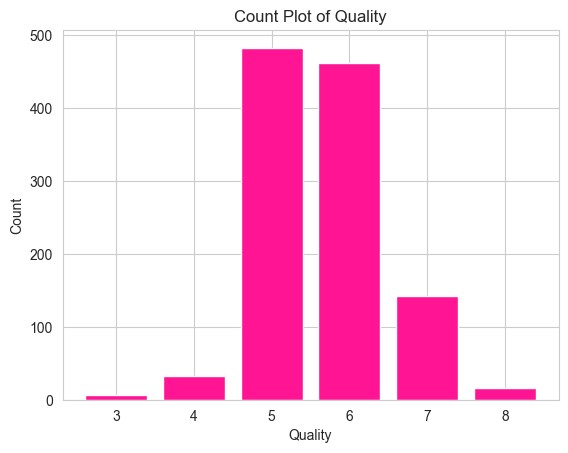

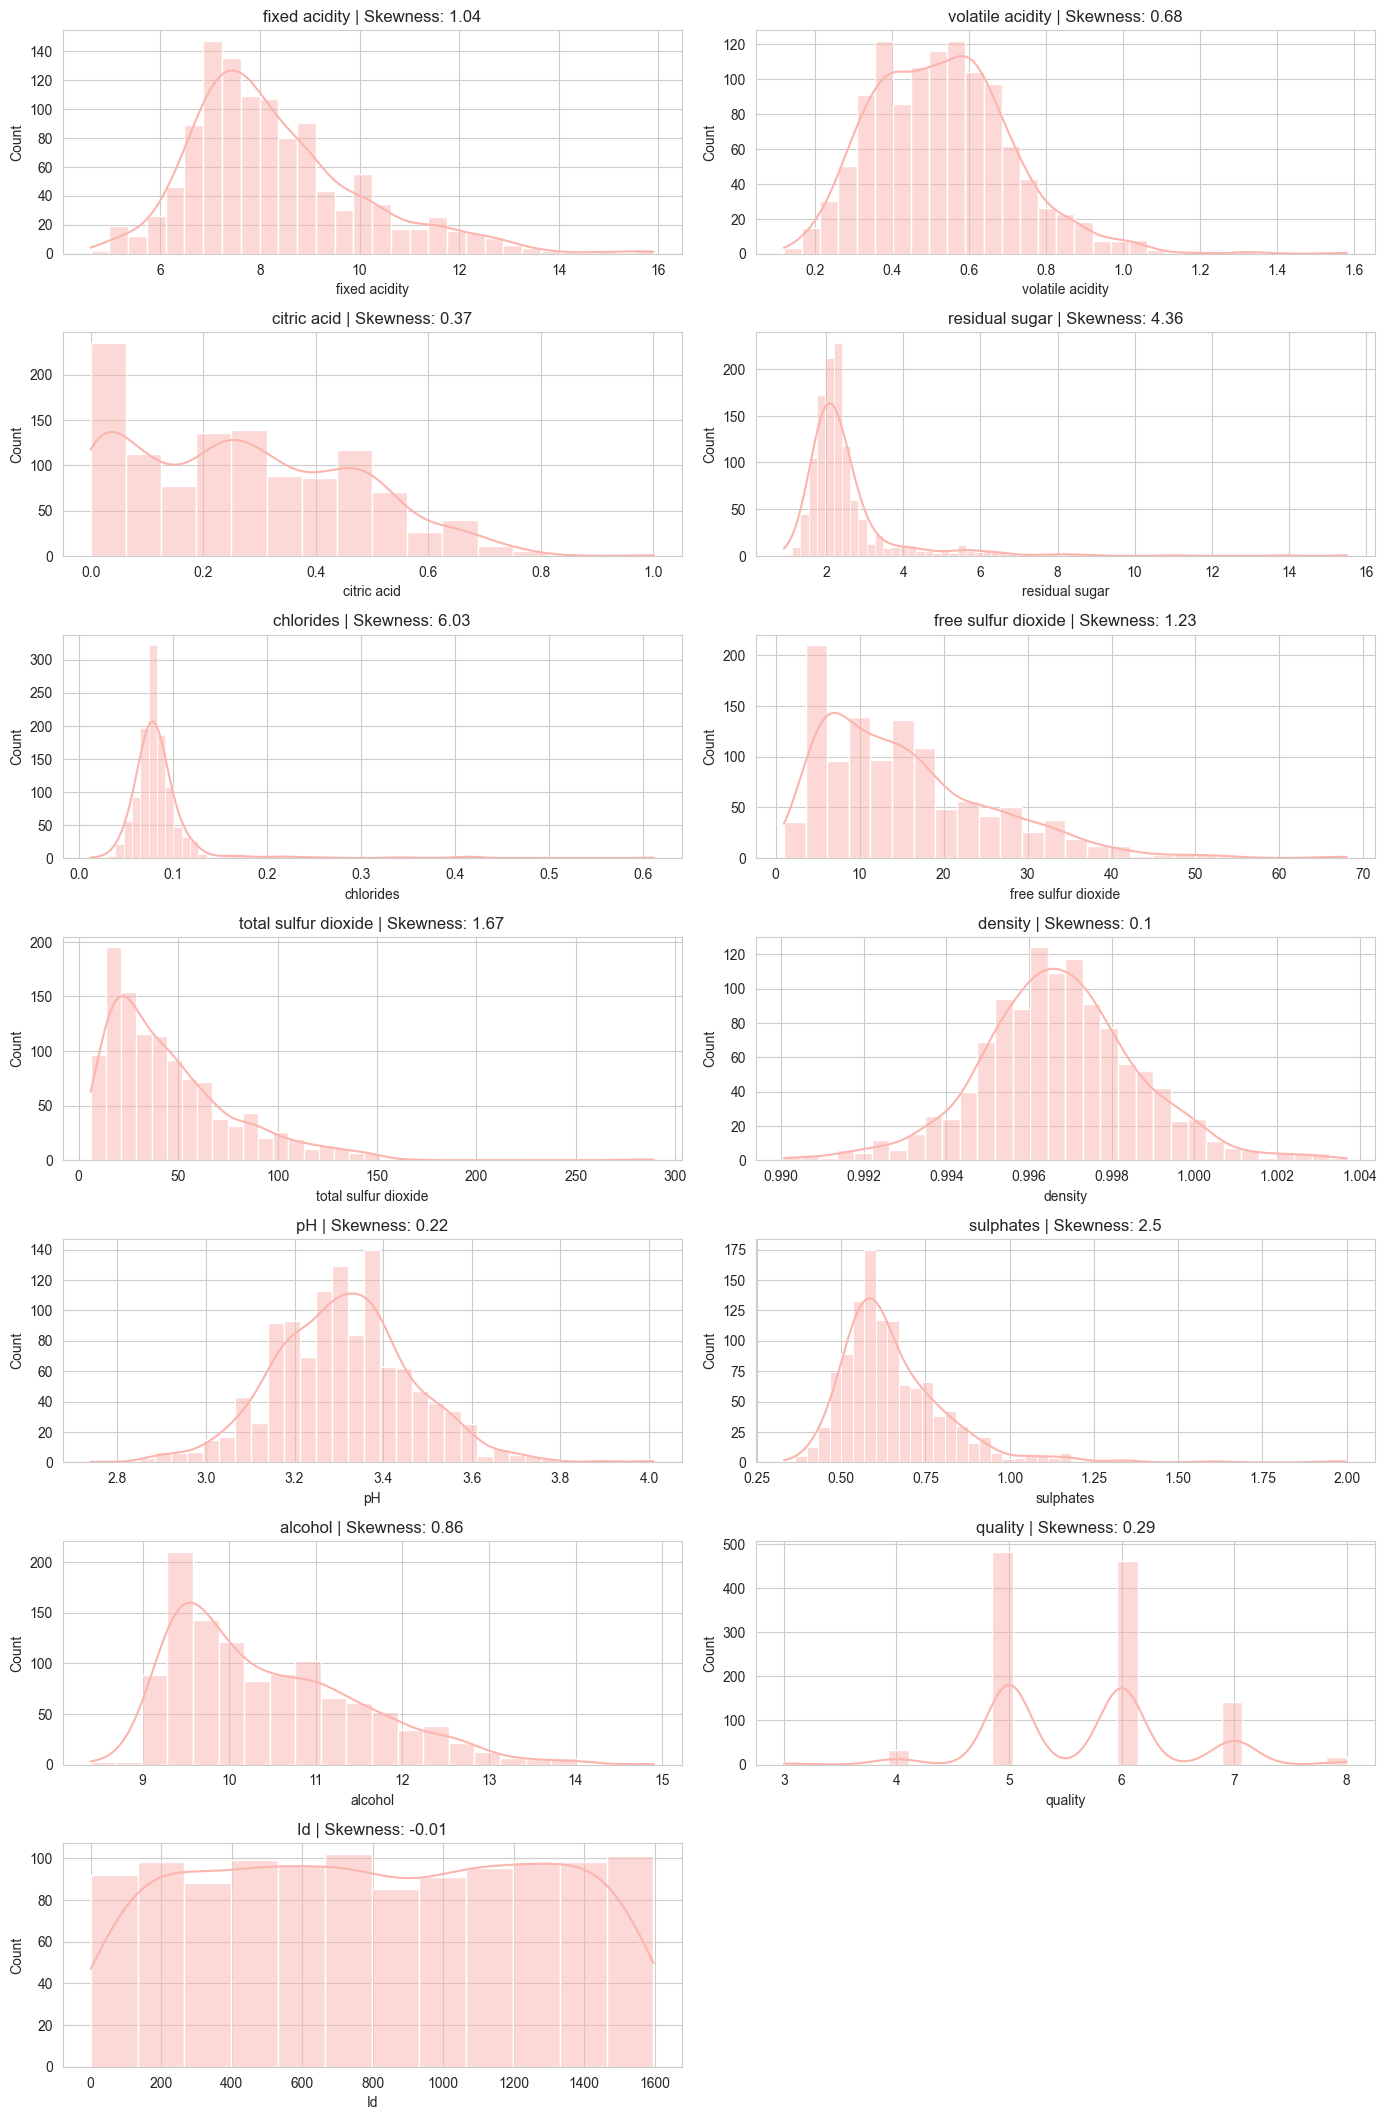

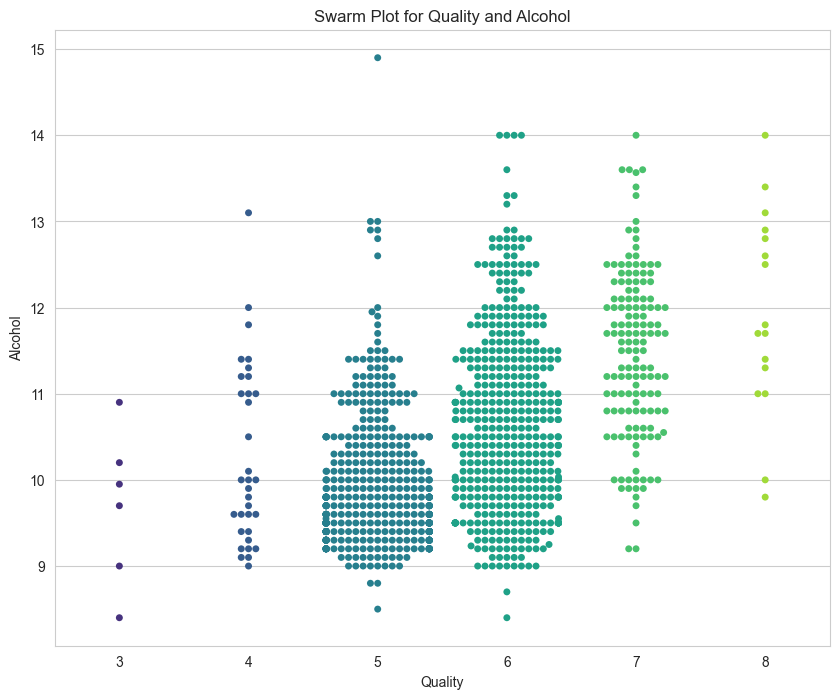

<Figure size 1000x600 with 0 Axes>

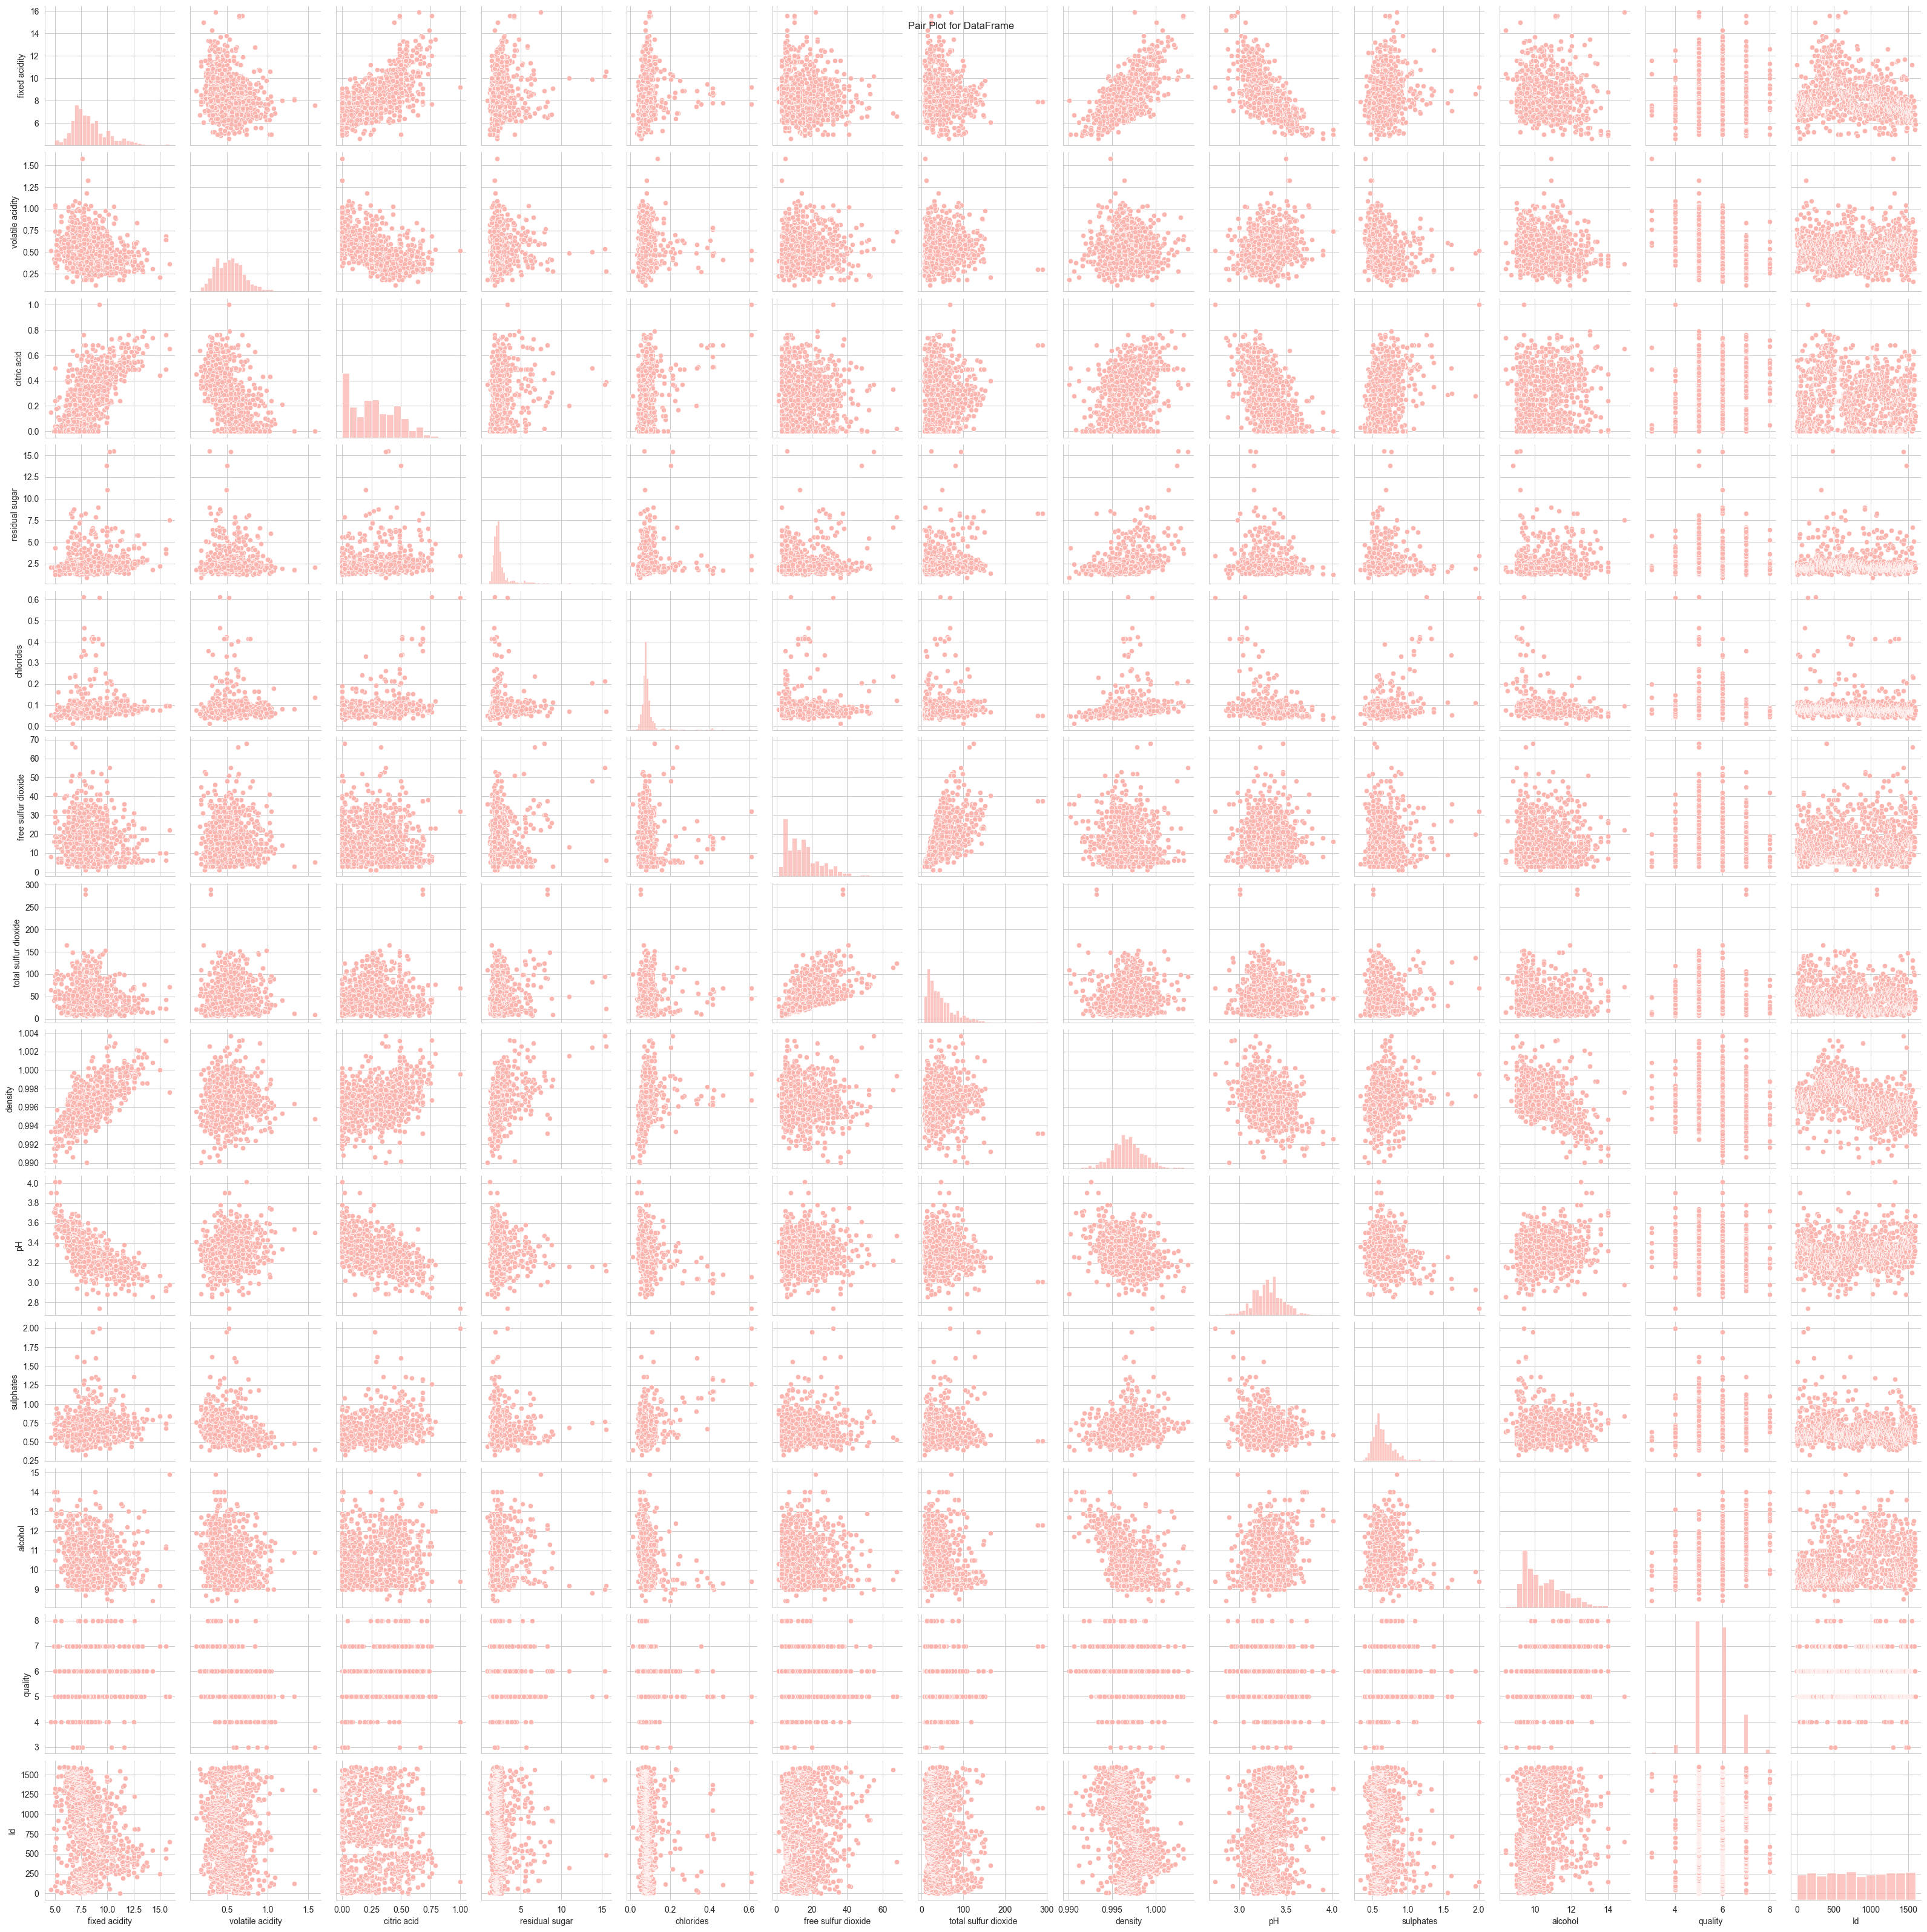

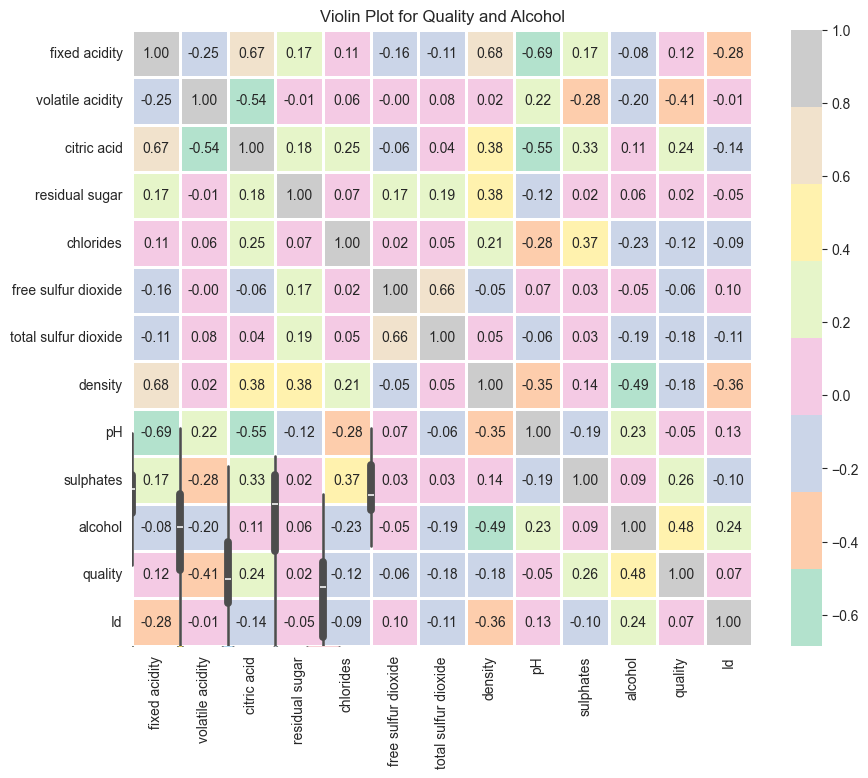

In [3]:
# Wine Quality EDA Project
# Step 1: Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

#Step 2: Reading Dataset
df = pd.read_csv("WineQT.csv")
print(df.head())

#Step 3: Analyzing the Data
df.shape
print(df.info())
df.describe().T
df.columns.tolist()

#Step 4 : Checking Missing Values
df.isnull().sum()

#Step 5 : Checking Duplicate Values
#df.duplicated().sum()
df.nunique()

#Step 6: Univariate Analysis
quality_counts = df['quality'].value_counts()
#print(quality_counts)
plt.bar(quality_counts.index, quality_counts, color='deeppink')
plt.title('Count Plot of Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
#plt.show()

# to get Datatypes
df.dtypes

# histplotting
sns.set_style("whitegrid")
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")
plt.tight_layout()
#plt.show()

# Swarm Plot
plt.figure(figsize=(10, 8))
sns.swarmplot(x="quality", y="alcohol", data=df, palette='viridis')
plt.title('Swarm Plot for Quality and Alcohol')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
#plt.show()

#Step 7: Bivariate Analysis using pair plotting
sns.set_palette("Pastel1")
plt.figure(figsize=(10, 6))
sns.pairplot(df)
plt.suptitle('Pair Plot for DataFrame')
#plt.show()

# Bivariate Analysis using violin plotting
df['quality'] = df['quality'].astype(str)  

plt.figure(figsize=(10, 8))
sns.violinplot(x="quality", y="alcohol", data=df, palette={'3': 'lightcoral', '4': 'lightblue', '5': 'lightgreen', '6': 'gold', '7': 'lightskyblue', '8': 'lightpink'}, alpha=0.7)
plt.title('Violin Plot for Quality and Alcohol')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
#plt.show()

# Multivariate Analysis
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)
#plt.title('Correlation Heatmap')
#plt.show()



In [4]:
#Used Cars EDA Project
# Step 1: Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
from datetime import date
wr.filterwarnings('ignore')

#Step 2: Reading Dataset
df = pd.read_csv("C:/Users/mydoc/used_cars_data.csv")
#print(df.head())

#Step 3: Analyzing the Data
df.shape
#print(df.info())
#df.describe().T
#df.columns.tolist()

#Step 4 : Checking Missing Values
print(" Missing Values: ",(df.isnull().sum()/(len(df)))*100)
df.isnull().sum()

#Step 5 : Checking Duplicate Values
#df.duplicated().sum()
#print(" Duplicate Values: ")
#df.nunique()

#to Drop unused columns
df=df.drop(['S.No.'],axis=1)
#df.head()

#to find Car Age
date.today().year
df['Car_Age']=date.today().year-df['Year']
#df.head()

#to split car Brand and Model names
df['Brand'] = df.Name.str.split().str.get(0)
df['Model'] = df.Name.str.split().str.get(1) + df.Name.str.split().str.get(2)
#df[['Name','Brand','Model']]
#df.head()

#Step 6: Data Cleaning/Wrangling
#print(df.Brand.unique())
#print(df.Brand.nunique())
searchfor = ['Isuzu' ,'ISUZU','Mini','Land']
df["Brand"].replace({"ISUZU": "Isuzu", "Mini": "Mini Cooper","Land":"Land Rover"}, inplace=True)
#print(df.Brand.unique())
#print(df.Brand.nunique())   



#Step 7: EDA Exploratory Data Analysis and Describe
#df.describe().T

#to get column types
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

#Step 9: EDA Univariate Analysis
#for col in num_cols:
#    print(col)
#    print('Skew :', round(df[col].skew(), 2))
#    plt.figure(figsize = (15, 4))
#    plt.subplot(1, 2, 1)
#    df[col].hist(grid=False)
#    plt.ylabel('count')
#    plt.subplot(1, 2, 2)
#    sns.boxplot(x=df[col])
  #  plt.show()

#Categorical Variables plotting
#fig, axes = plt.subplots(3, 2, figsize = (18, 18))
#fig.suptitle('Bar plot for all categorical variables in the dataset')
#sns.countplot(ax = axes[0, 0], x = 'Fuel_Type', data = df, color = 'pink', order = df['Fuel_Type'].value_counts().index);
#sns.countplot(ax = axes[0, 1], x = 'Transmission', data = df, color = 'blue', order = df['Transmission'].value_counts().index);
#sns.countplot(ax = axes[1, 0], x = 'Owner_Type', data = df, color = 'green', order = df['Owner_Type'].value_counts().index);
#sns.countplot(ax = axes[1, 1], x = 'Location', data = df, color = 'red', order = df['Location'].value_counts().index);
#sns.countplot(ax = axes[2, 0], x = 'Brand', data = df, color = 'skyblue', order = df['Brand'].head(20).value_counts().index);
#sns.countplot(ax = axes[2, 1], x = 'Model', data = df, color = 'orange', order = df['Model'].head(20).value_counts().index);
#axes[1][1].tick_params(labelrotation=45);
#axes[2][0].tick_params(labelrotation=90);
#axes[2][1].tick_params(labelrotation=90);

#Step 10: Data Transformation
# Function for log transformation of the column
def log_transform(df,col):
    for colname in col:
        if (df[colname] == 1.0).all():
            df[colname + '_log'] = np.log(df[colname]+1)
        else:
            df[colname + '_log'] = np.log(df[colname])
    df.info()
log_transform(df,['Kilometers_Driven','Price'])
#Log transformation of the feature 'Kilometers_Driven'
sns.distplot(df["Kilometers_Driven_log"], axlabel="Kilometers_Driven_log");
plt.show()

#Step 11: EDA Bivariate Analysis
#plt.figure(figsize=(13,17))
#sns.pairplot(data=df.drop(['Kilometers_Driven','Price'],axis=1))
#plt.show()

fig, axarr = plt.subplots(4, 2, figsize=(12, 18))
df.groupby('Location')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Location Vs Price", fontsize=18)
df.groupby('Transmission')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Transmission Vs Price", fontsize=18)
df.groupby('Fuel_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Fuel_Type Vs Price", fontsize=18)
df.groupby('Owner_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Owner_Type Vs Price", fontsize=18)
df.groupby('Brand')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("Brand Vs Price", fontsize=18)
df.groupby('Model')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("Model Vs Price", fontsize=18)
df.groupby('Seats')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0], fontsize=12)
axarr[3][0].set_title("Seats Vs Price", fontsize=18)
df.groupby('Car_Age')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][1], fontsize=12)
axarr[3][1].set_title("Car_Age Vs Price", fontsize=18)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/mydoc/used_cars_data.csv'